In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt 

from create_sequence_w_labels import *
from initial_guess import *
from cml_incomplete_edhmm import fit as cml_fit
from new_edhmm_bw import fit_edhmm as bw_fit

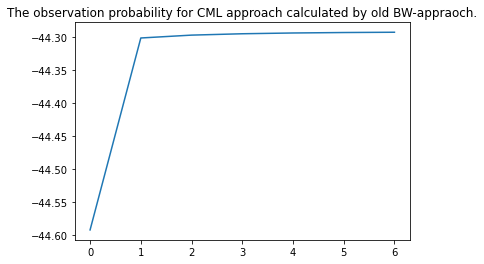

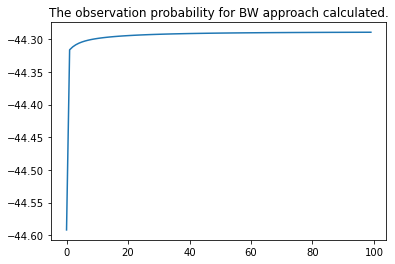

The CML approach gives 0.9973133983709161 times better probability estimation than what BW approach does.


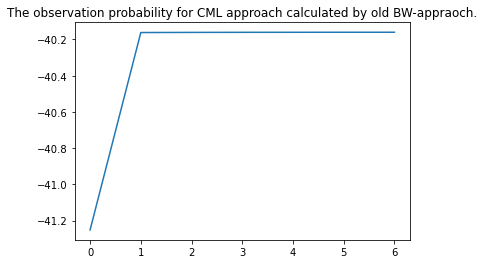

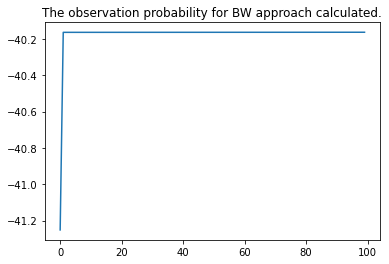

The CML approach gives 1.0025309524032142 times better probability estimation than what BW approach does.


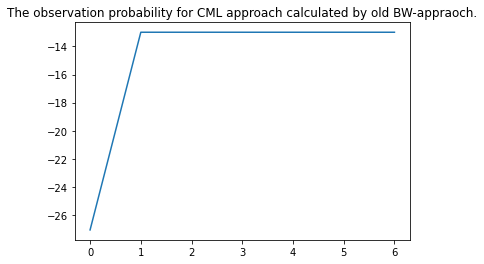

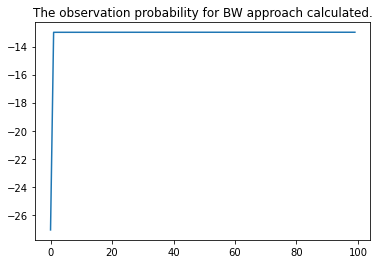

The CML approach gives 0.9962881238357523 times better probability estimation than what BW approach does.


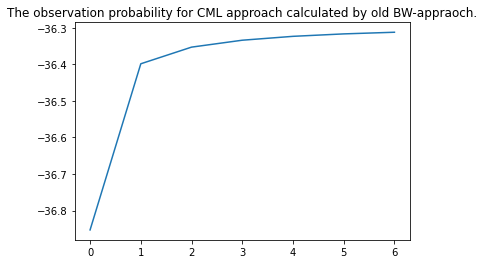

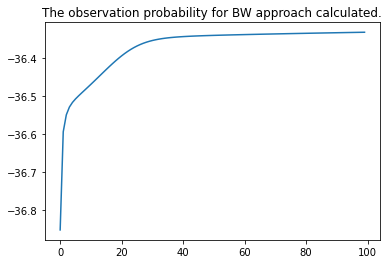

The CML approach gives 1.019000737335271 times better probability estimation than what BW approach does.


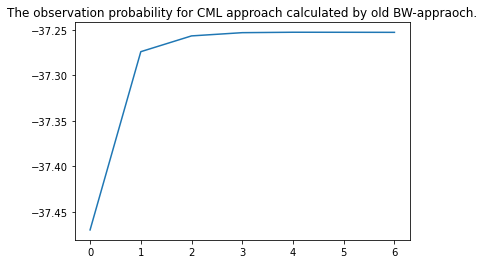

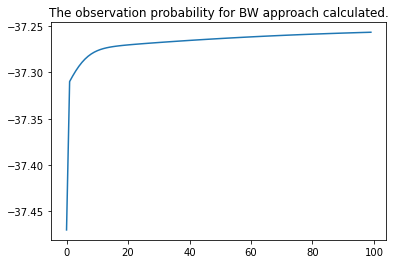

The CML approach gives 1.0040287670539647 times better probability estimation than what BW approach does.


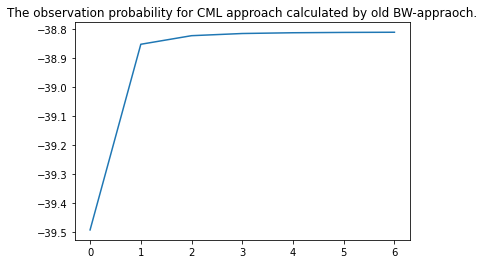

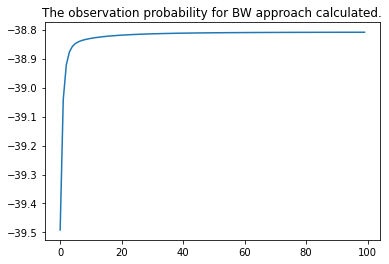

The CML approach gives 0.9977845447244486 times better probability estimation than what BW approach does.


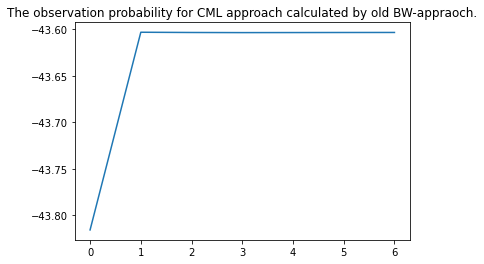

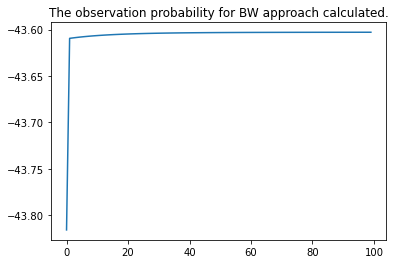

The CML approach gives 0.9994792213677688 times better probability estimation than what BW approach does.


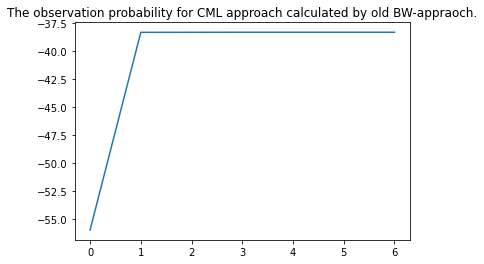

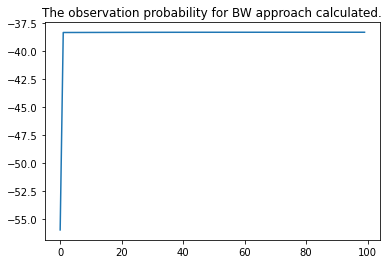

The CML approach gives 0.9990266923881417 times better probability estimation than what BW approach does.


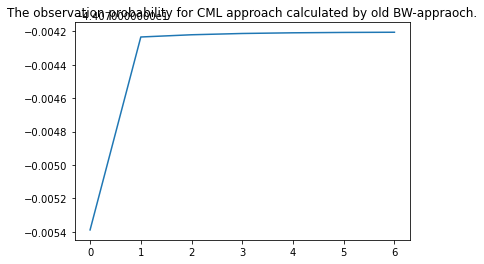

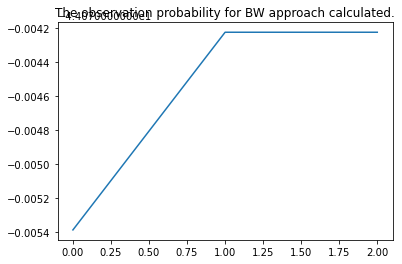

The CML approach gives 1.0000183713053339 times better probability estimation than what BW approach does.


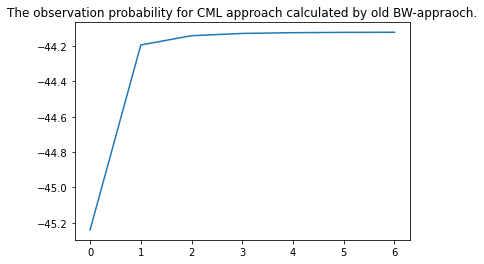

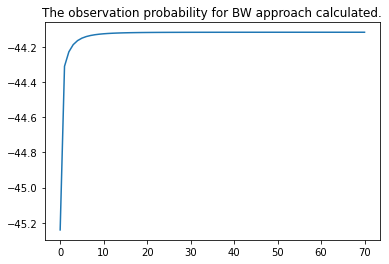

The CML approach gives 0.9954717008331327 times better probability estimation than what BW approach does.


In [3]:
for i in range(10):
    T = 1024
    N = 64
    S = 2
    D = 2
    K = S*D
    L = 2
    noise = 0.3
    max_iter = 7

    A_gt, B_gt, pi_gt, P_gt, observations, states, labels = hmmgenerate(K, L, T, N, S, D, edhmm = True, complete = False)
    A_init, B_init, pi_init, P_init = get_initial_values_edhmm(A_gt, B_gt, P_gt, noise, D, have_P = True)

    A, B, P, pi, _, ln_P_cml = cml_fit(A_init, B_init, P_init, pi_init, S, D, observations, labels, max_iter)
    plt.plot(ln_P_cml)
    plt.title("The observation probability for CML approach calculated by old BW-appraoch.")
    plt.show()
    
    A, B, pi, ln_P_bw, _, _ = bw_fit(A_init, B_init, pi_init, observations, D, NUM_ITER = 100)
    plt.plot(ln_P_bw)
    plt.title("The observation probability for BW approach calculated.")
    plt.show()
    
    print('The CML approach gives ' + str(np.exp((ln_P_cml[-1]) - (ln_P_bw[-1]))) + ' times better probability estimation than what BW approach does.')